# Importance of the (pt, phi) bins for classification


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from four_momentum import PT, PHI
import os

In [2]:
def polar_plot(we, label='(a) EoSL', npt_cut=13):
    r = PT[:npt_cut]
    t = PHI
    R, T = np.meshgrid(r, t)
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, polar=True)
    #ax.pcolor(T, R, we[:npt_cut, :].T)
    ax.contourf(T, R, we[:npt_cut, :].T)
    #ax.text(8.8*np.pi/16., 3.2, label, size=15)
    ax.set_title(label, size=15, y=1.08)
    #help(ax.set_title)
    if 'EoSL' in label:
        plt.savefig('we_eosl.png')
    else:
        plt.savefig('we_eosq.png')

In [3]:
#from common_plotting import smash_style
import scipy
print(scipy.__version__)
from scipy.interpolate import interp2d

def interp_for_imshow(x, y, image):
    xx, yy = np.meshgrid(x, y)
    plt.contourf(xx, yy, image, cmap='viridis', interpolation='cubic')
    
#interp_for_imshow(PHI, PT, we_eosl)


0.19.0


In [4]:
import seaborn as sns


def plot_we(data, fig_name='we_eosl_iebe.pdf', label="(a) EOSL, GROUP 1", no_y=True):
    '''Args:
           data: importance map for eosl or eosq
           eos: eosl or eosq'''
    sns.set_context('talk', font_scale=1.0)
    xx, yy = np.meshgrid(PHI, PT)
    num_of_mixed_events = 10.0
    data[data < 0] = 0.0
    fig = plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, data/num_of_mixed_events, 10,
               aspect='auto',
               origin='lower',
               extent=(PHI[0], PHI[-1], PT[0], PT[-1]),
               cmap='viridis',
              interpolation='None')

    plt.xticks([np.pi/2., np.pi, 3*np.pi/2.], [r'$\pi/2$', r'$\pi$', r'$3\pi/2$'])
    if not no_y: plt.ylabel(r'$p_\mathrm{T}\ [\mathrm{GeV}]$', fontstyle='normal')
    plt.xlabel(r'$\phi$')
    plt.ylim(0, 2.0)
    plt.text(0.3, 1.7, label, color='w')
    #smash_style.set()
    clb = plt.colorbar()
    #clb.ax.set_title("WE", fontsize=15)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(os.path.join('subfigs/', fig_name.replace('pdf', 'png')))

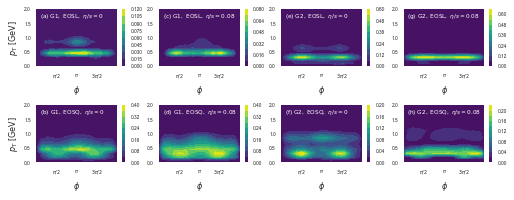

In [5]:
sns.set_context('paper', font_scale=0.6)
def subp(data, fig_name='we_eosl_iebe.pdf', label="(a) EOSL, GROUP 1", no_y=True):
    xx, yy = np.meshgrid(PHI, PT)
    num_of_mixed_events = 10.0
    data[data < 0] = 0.0
    #fig = plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, data/num_of_mixed_events, 10,
               aspect='auto',
               origin='lower',
               extent=(PHI[0], PHI[-1], PT[0], PT[-1]),
               cmap='viridis',
              interpolation='None')

    plt.xticks([np.pi/2., np.pi, 3*np.pi/2.], [r'$\pi/2$', r'$\pi$', r'$3\pi/2$'])
    if not no_y: plt.ylabel(r'$p_\mathrm{T}\ [\mathrm{GeV}]$', fontstyle='normal', fontsize=8)
    plt.xlabel(r'$\phi$', fontsize=8)
    plt.ylim(0, 2.0)
    plt.text(0.3, 1.7, label, color='w')
    clb = plt.colorbar()
    plt.tight_layout()


we_eosl_iebe_etas0 = np.loadtxt('avg_we_clean_iebe_etas0/avg_we_eosl_iebe_etas0_mix__mix.dat')
we_eosq_iebe_etas0 = np.loadtxt('avg_we_clean_iebe_etas0/avg_we_eosq_iebe_etas0_mix__mix.dat')

we_eosl_iebe_etas0p08 = np.loadtxt('avg_we_clean_iebe_etas0p08/avg_we_eosl_iebe_etas0p08.dat')
we_eosq_iebe_etas0p08 = np.loadtxt('avg_we_clean_iebe_etas0p08/avg_we_eosq_iebe_etas0p08.dat')

we_eosl_ipg = np.loadtxt('avg_we_clean_ipglasma/avg_we_eosl.dat')
we_eosq_ipg = np.loadtxt('avg_we_clean_ipglasma/avg_we_eosq.dat')
# Notice that this is for ideal hydrodynamics with IP-Glasma initial condition, the <pt> is bigger

we_eosl = np.loadtxt('avg_we_clean_ipglasma_etas0p08/avg_we_eosl.dat')
we_eosq = np.loadtxt('avg_we_clean_ipglasma_etas0p08/avg_we_eosq.dat')
# Notice that this is for ideal hydrodynamics with IP-Glasma initial condition, the <pt> is bigger


fig = plt.figure(figsize=(18/2.54, 7/2.54))
plt.subplot(241)
subp(we_eosl_iebe_etas0, 'we_eosl_iebe_etas0.pdf', label=r'$\mathrm{(a)\ G1,\ EOSL,}\ \eta/s=0$', no_y=False)

plt.subplot(242)
subp(we_eosl_iebe_etas0p08, 'we_eosl_iebe_etas0p08.pdf', r'$\mathrm{(c)\ G1,\ EOSL,}\ \eta/s=0.08$')

plt.subplot(243)
subp(we_eosl_ipg, 'we_eosl_ipglasma_etas0.pdf',  r'$\mathrm{(e)\ G2,\ EOSL,}\ \eta/s=0$')


plt.subplot(244)
subp(we_eosl, 'we_eosl_ipglasma_etas0p08.pdf', label=r'$\mathrm{(g)\ G2,\ EOSL,}\ \eta/s=0.08$')

plt.subplot(245)
subp(we_eosq_iebe_etas0, 'we_eosq_iebe_etas0.pdf', label=r'$\mathrm{(b)\ G1,\ EOSQ,}\ \eta/s=0$', no_y=False)

plt.subplot(246)
subp(we_eosq_iebe_etas0p08, 'we_eosq_iebe_etas0p08.pdf', r'$\mathrm{(d)\ G1,\ EOSQ},\ \eta/s=0.08$')

plt.subplot(247)
subp(we_eosq_ipg, 'we_eosq_ipglasma_etas0.pdf', r'$\mathrm{(f)\ G2,\ EOSQ,}\ \eta/s=0$')

plt.subplot(248)
subp(we_eosq, 'we_eosq_ipglasma_etas0p08.pdf', label=r'$\mathrm{(h)\ G2,\ EOSQ,}\ \eta/s=0.08$')
plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.savefig('weight_evidence.pdf')

In [6]:
we_eosl_iebe_etas0 = np.loadtxt('avg_we_clean_iebe_etas0/avg_we_eosl_iebe_etas0_mix__mix.dat')
we_eosq_iebe_etas0 = np.loadtxt('avg_we_clean_iebe_etas0/avg_we_eosq_iebe_etas0_mix__mix.dat')

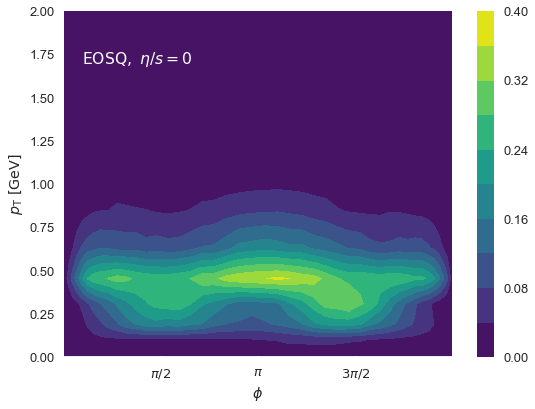

In [7]:
#plot_we(we_eosq_iebe_etas0, 'we_eosq_iebe_etas0.pdf', label=r'$\mathrm{(b)\ G1,\ EOSQ,}\ \eta/s=0$', no_y=False)
plot_we(we_eosq_iebe_etas0, 'fig3_sub_b.png', label=r'$\mathrm{EOSQ,}\ \eta/s=0$', no_y=False)

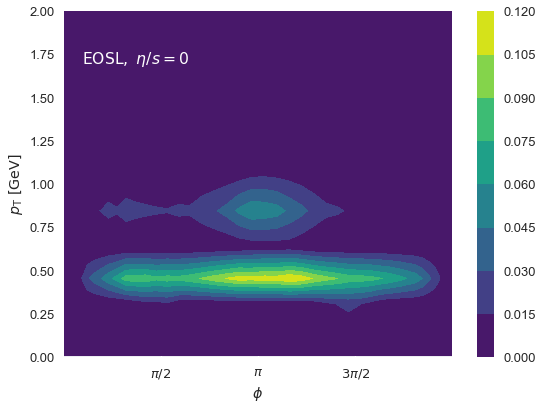

In [8]:
#plot_we(we_eosl_iebe_etas0, 'we_eosl_iebe_etas0.pdf', label=r'$\mathrm{(a)\ G1,\ EOSL,}\ \eta/s=0$', no_y=False)
plot_we(we_eosl_iebe_etas0, 'fig3_sub_a.png', label=r'$\mathrm{EOSL,}\ \eta/s=0$', no_y=False)

In [49]:
we_eosl_iebe_etas0p08 = np.loadtxt('avg_we_clean_iebe_etas0p08/avg_we_eosl_iebe_etas0p08.dat')
we_eosq_iebe_etas0p08 = np.loadtxt('avg_we_clean_iebe_etas0p08/avg_we_eosq_iebe_etas0p08.dat')

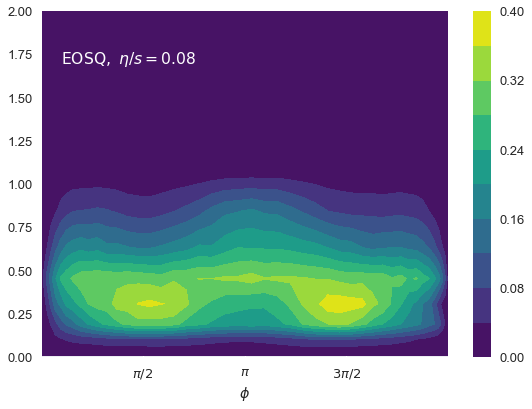

In [9]:
#plot_we(we_eosq_iebe_etas0p08, 'we_eosq_iebe_etas0p08.pdf', r'$\mathrm{(d)\ G1,\ EOSQ},\ \eta/s=0.08$')
plot_we(we_eosq_iebe_etas0p08, 'fig3_sub_d.png', r'$\mathrm{EOSQ},\ \eta/s=0.08$')

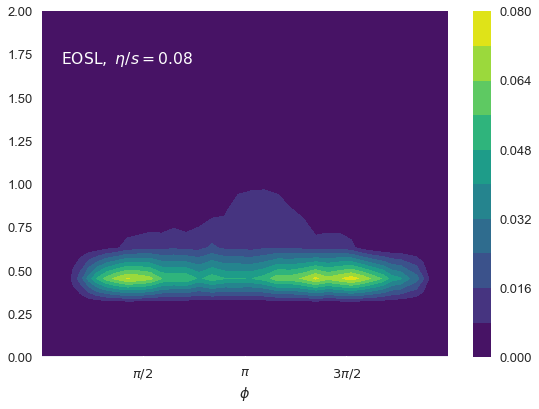

In [11]:
#plot_we(we_eosl_iebe_etas0p08, 'we_eosl_iebe_etas0p08.pdf', r'$\mathrm{(c)\ G1,\ EOSL,}\ \eta/s=0.08$')
plot_we(we_eosl_iebe_etas0p08, 'fig3_sub_c.png', r'$\mathrm{EOSL,}\ \eta/s=0.08$')

In [17]:
we_eosl_ipg = np.loadtxt('avg_we_clean_ipglasma/avg_we_eosl.dat')
we_eosq_ipg = np.loadtxt('avg_we_clean_ipglasma/avg_we_eosq.dat')
# Notice that this is for ideal hydrodynamics with IP-Glasma initial condition, the <pt> is bigger

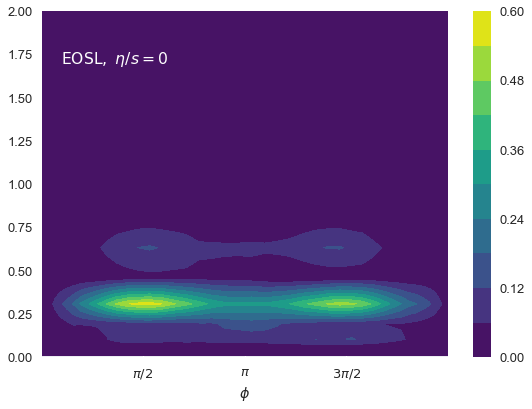

In [18]:
plot_we(we_eosl_ipg, 'fig3_sub_e.png',  r'$\mathrm{EOSL,}\ \eta/s=0$')

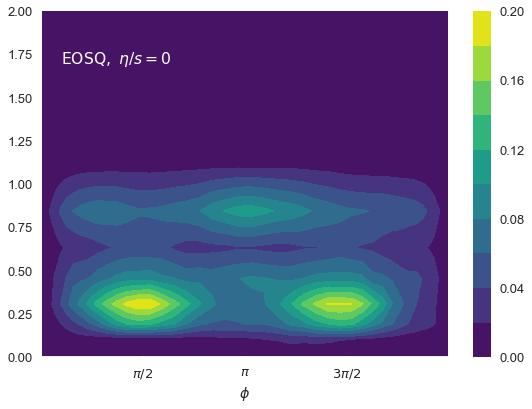

In [19]:
plot_we(we_eosq_ipg, 'fig3_sub_f.png', r'$\mathrm{EOSQ,}\ \eta/s=0$')

In [20]:
we_avg = np.loadtxt('avg_we_clean_ipglasma_etas0p08/avg_we.dat')
we_eosl = np.loadtxt('avg_we_clean_ipglasma_etas0p08/avg_we_eosl.dat')
we_eosq = np.loadtxt('avg_we_clean_ipglasma_etas0p08/avg_we_eosq.dat')
# Notice that this is for ideal hydrodynamics with IP-Glasma initial condition, the <pt> is bigger

In [21]:
plot_we(we_eosl, 'fig3_sub_g.png', label=r'$\mathrm{EOSL,}\ \eta/s=0.08$')

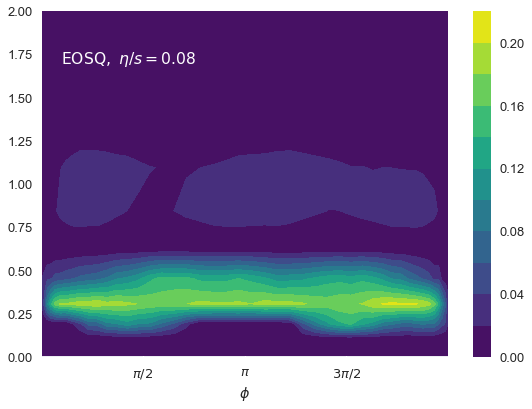

In [22]:
plot_we(we_eosq, 'fig3_sub_h.png', label=r'$\mathrm{EOSQ,}\ \eta/s=0.08$')

## check the prediction difference for each single event

In [75]:
eosl_events = np.load('avg_we_clean_ipglasma/we_eosl_list.npy')
eosq_events = np.load('avg_we_clean_ipglasma/we_eosq_list.npy')

In [31]:
len(eosl_events)

907

In [32]:
len(eosq_events)

1093

## For EOSL

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5)
rand_ids = np.random.choice(len(eosl_events), 25, replace=False)

for i in xrange(25):
    eosl_i = eosl_events[rand_ids[i]]
    eosl_i[eosl_i<0] = 0.0
    ax[i/5, i%5].contourf(xx, yy,
           eosl_i/num_of_mixed_events, origin='lower',
           aspect='auto',
           extent=(PHI[0], PHI[-1], PT[0], PT[-1]),
           cmap='viridis',
           interpolation='None')
    ax[i/5, i%5].set_ylim(0, 2.0)
    ax[i/5, i%5].set_xticks([])
    ax[i/5, i%5].set_yticks([])

plt.subplots_adjust(hspace=0.01, wspace=0.01)

## For EOSQ

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5)
rand_ids = np.random.choice(len(eosq_events), 25, replace=False)

for i in xrange(25):
    eosq_i = eosq_events[rand_ids[i]]
    eosq_i[eosq_i<0] = 0.0
    ax[i/5, i%5].contourf(xx, yy,
           eosq_i/num_of_mixed_events, origin='lower',
           aspect='auto',
           extent=(PHI[0], PHI[-1], PT[0], PT[-1]),
           cmap='viridis',
           interpolation='None')
    ax[i/5, i%5].set_ylim(0, 2.0)
    ax[i/5, i%5].set_xticks([])
    ax[i/5, i%5].set_yticks([])

plt.subplots_adjust(hspace=0.01, wspace=0.01)    